In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()


In [ ]:
# Loading Data
df = pd.read_csv("CombinedData.csv")
df.head()

,time,ENV__SOIL__VWC_-30,ENV__SOIL__T_-30,ENV__ATMO__IRRADIATION_TOP,ENV__ATMO__RH_TOP,ENV__ATMO__T_TOP,ENV__ATMO__RADIANT_EXPOSURE_TOP
0,2023-04-20 10:30:00,24.37,11.33,212.736115,63.0,8.66,9.709765e+05
1,2023-04-20 11:30:00,24.15,10.78,775.780212,59.0,10.65,1.663625e+06
2,2023-04-20 12:30:00,24.11,10.17,84.064178,70.0,8.05,6.715528e+05
3,2023-04-20 13:30:00,24.11,10.81,153.934753,70.0,8.57,4.450700e+05
4,2023-04-20 14:30:00,24.07,10.73,89.971535,69.0,8.93,4.589008e+05


In [ ]:
# Data Preprocessing (Normalisation)
df['time'] = pd.to_datetime(df['time']).dt.normalize()
df

,time,ENV__SOIL__VWC_-30,ENV__SOIL__T_-30,ENV__ATMO__IRRADIATION_TOP,ENV__ATMO__RH_TOP,ENV__ATMO__T_TOP,ENV__ATMO__RADIANT_EXPOSURE_TOP
0,2023-04-20,24.37,11.33,212.736115,63.0,8.660000,9.709765e+05
1,2023-04-20,24.15,10.78,775.780212,59.0,10.650000,1.663625e+06
2,2023-04-20,24.11,10.17,84.064178,70.0,8.050000,6.715528e+05
3,2023-04-20,24.11,10.81,153.934753,70.0,8.570000,4.450700e+05
4,2023-04-20,24.07,10.73,89.971535,69.0,8.930000,4.589008e+05
...,...,...,...,...,...,...,...
971,2023-05-30,18.18,18.98,1291.708862,30.0,26.469999,4.210448e+06
972,2023-05-30,18.18,18.95,651.961975,28.0,26.799999,3.875972e+06
973,2023-05-30,18.14,19.73,1292.254395,25.0,26.600000,4.721590e+06
974,2023-05-30,18.10,19.44,135.422058,25.0,25.410000,2.850408e+06


In [ ]:
# Taking only mean values of the day
df.groupby(df.time.dt.time).mean()
df

<ipython-input-4-508c28a0ee7b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df.time.dt.time).mean()


,time,ENV__SOIL__VWC_-30,ENV__SOIL__T_-30,ENV__ATMO__IRRADIATION_TOP,ENV__ATMO__RH_TOP,ENV__ATMO__T_TOP,ENV__ATMO__RADIANT_EXPOSURE_TOP
0,2023-04-20,24.37,11.33,212.736115,63.0,8.660000,9.709765e+05
1,2023-04-20,24.15,10.78,775.780212,59.0,10.650000,1.663625e+06
2,2023-04-20,24.11,10.17,84.064178,70.0,8.050000,6.715528e+05
3,2023-04-20,24.11,10.81,153.934753,70.0,8.570000,4.450700e+05
4,2023-04-20,24.07,10.73,89.971535,69.0,8.930000,4.589008e+05
...,...,...,...,...,...,...,...
971,2023-05-30,18.18,18.98,1291.708862,30.0,26.469999,4.210448e+06
972,2023-05-30,18.18,18.95,651.961975,28.0,26.799999,3.875972e+06
973,2023-05-30,18.14,19.73,1292.254395,25.0,26.600000,4.721590e+06
974,2023-05-30,18.10,19.44,135.422058,25.0,25.410000,2.850408e+06


In [ ]:
# Setting time as the index
df = df.set_index('time').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df

,ENV__SOIL__VWC_-30,ENV__SOIL__T_-30,ENV__ATMO__IRRADIATION_TOP,ENV__ATMO__RH_TOP,ENV__ATMO__T_TOP,ENV__ATMO__RADIANT_EXPOSURE_TOP
time,,,,,,
2023-04-20,24.020000,10.534286,103.470786,75.857143,8.641429,3.495412e+05
2023-04-21,23.716667,10.765833,265.331336,64.000000,14.463750,9.986366e+05
2023-04-22,23.630000,11.539565,267.886564,53.695652,17.776087,8.644837e+05
2023-04-23,23.702308,12.489615,188.664179,71.380952,14.376923,5.477660e+05
2023-04-24,23.633750,12.819583,72.086756,76.428571,9.851667,3.677644e+05
2023-04-25,23.753636,12.334091,140.127466,74.090909,8.044545,3.417055e+05
2023-04-26,24.128750,12.247083,185.790668,60.958333,7.264583,6.507548e+05
2023-04-27,24.012400,12.249600,258.796383,55.958333,10.879583,8.887631e+05
2023-04-28,24.022000,12.633600,50.638303,84.210526,11.289600,1.794472e+05


<Axes: xlabel='time'>

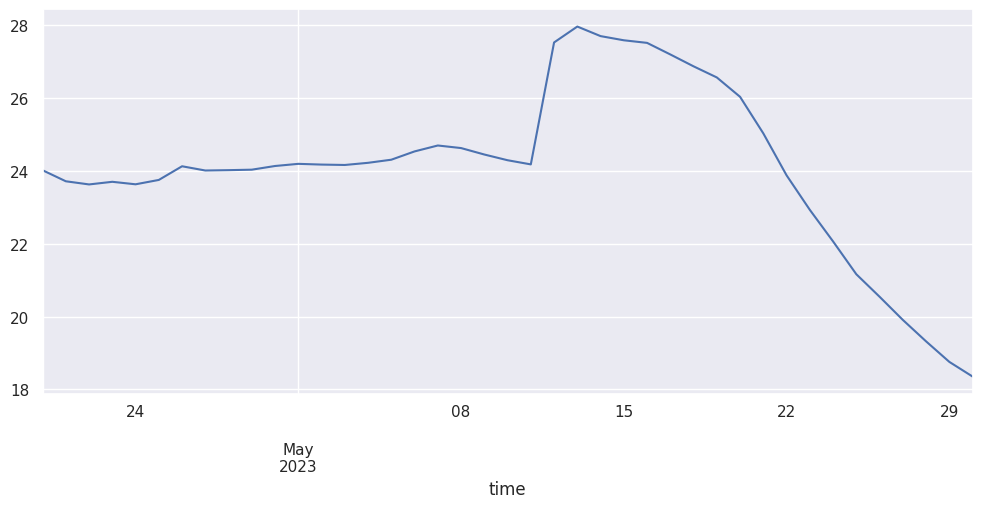

In [ ]:
# PLotting of the values
df["ENV__SOIL__VWC_-30"].plot(figsize = (12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Function to test if the dataset can be used for ARIMA
def ad_statistical_test(dataset):
  df_test = adfuller(dataset, autolag = "AIC")
  for i in df_test:
    print(i)


In [ ]:
ad_statistical_test(df['ENV__SOIL__VWC_-30'])

-0.21914107264809063
0.9362012598390681
1
39
{'1%': -3.610399601308181, '5%': -2.939108945868946, '10%': -2.6080629651545038}
70.20033453620094


In [ ]:
!pip install pmdarima
from pmdarima import auto_arima
# Fit the ARIMA model using auto_arima
model = auto_arima(df['ENV__SOIL__VWC_-30'], seasonal=False, trace=True)

# Print the best model order
print('ARIMA Model Order:', model.order)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.7 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=96.481, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=379.633, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=93.913, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=92.695, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=92.095, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=95.390, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0] inte

In [ ]:
import os

directory = 'path/to/directory'  # Specify the directory path
file_path = os.path.join(directory, 'filename.txt')  # Specify the file path within the directory

try:
    if not os.path.exists(directory):
        os.makedirs(directory)  # Create the directory if it does not exist

    # Save the file
    with open(file_path, 'w') as file:
        file.write("Hello, World!")
        # Add your file-saving logic here

    print("File saved successfully.")
except FileNotFoundError:
    print("Directory or file path not found.")

File saved successfully.


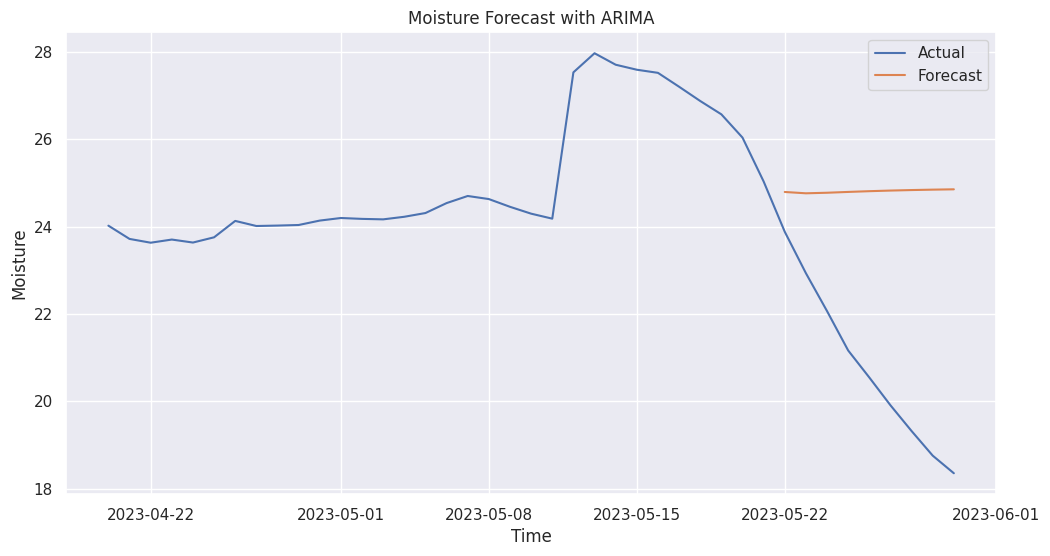

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_data, test_data = df[:train_size], df[train_size:]

# Train the ARIMA model using the determined order
model = ARIMA(train_data['ENV__SOIL__VWC_-30'], order=(2, 0, 1))
model_fit = model.fit()

# Forecast moisture for the test set
forecast= model_fit.forecast(steps=len(test_data))

# Visualize the forecasted results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ENV__SOIL__VWC_-30'], label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Moisture')
plt.title('Moisture Forecast with ARIMA')
plt.legend()
#plt.savefig('path/positionsnew1.svg', bbox_inches='tight')
plt.savefig('path/positionsnw1.png', bbox_inches='tight')
plt.show()


In [ ]:
df.shape

(41, 6)

In [ ]:
train =df.iloc[:-5]
test = df.iloc[-5:]
print(train.shape, test.shape)

(36, 6) (5, 6)


In [ ]:
model = ARIMA(train['ENV__SOIL__VWC_-30'], order = (2,0,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     ENV__SOIL__VWC_-30   No. Observations:                   36
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -32.999
Date:                Tue, 06 Jun 2023   AIC                             75.999
Time:                        05:36:54   BIC                             83.916
Sample:                    04-20-2023   HQIC                            78.762
                         - 05-25-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7081      0.450     54.899      0.000      23.826      25.590
ar.L1          1.9014      0.136     14.015      0.000       1.636       2.167
ar.L2         -0.9557      0.087    -10.944      0.000      -1.127      -0.785
ma.L1         -0.9999    443.259     -0.002      0.998    -869.772     867.773
sigma2         0.3137    139.014      0.002      0.998    -272.148     272.775
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):               750.02
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               2.38   Skew:                             4.33
Prob(H) (two-sided):                  0.15   Kurtosis:                        23.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Model prediction
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start = start, end = end, typ = "levels")
print(pred)

2023-05-26    20.970803
2023-05-27    20.988806
2023-05-28    21.207829
2023-05-29    21.607079
2023-05-30    22.156901
Freq: D, Name: predicted_mean, dtype: float64


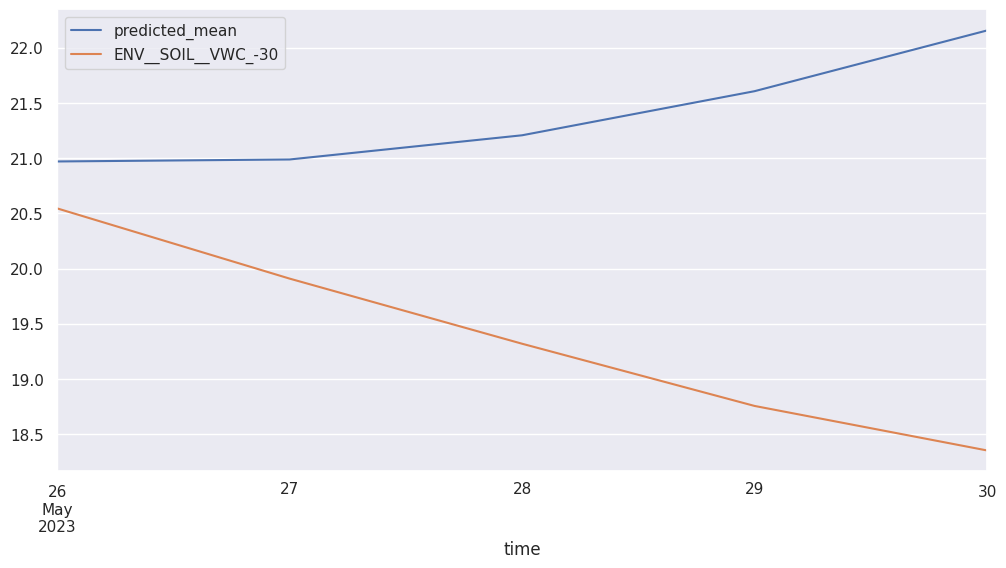

In [ ]:
plt.figure(figsize=(12, 6))
pred.plot(legend = True)
test['ENV__SOIL__VWC_-30'].plot(legend = True)
#plt.savefig('path/positionsnew2.svg', bbox_inches='tight')
plt.savefig('path/positionsnw2.png', bbox_inches='tight')

In [ ]:
test['ENV__SOIL__VWC_-30'].mean()

19.377953333333334

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test['ENV__SOIL__VWC_-30']))
rmse

2.3443735970163453

In [ ]:
model2 = ARIMA(df['ENV__SOIL__VWC_-30'], order = (2,0,1))
model2 =  model2.fit()
df.tail()

,ENV__SOIL__VWC_-30,ENV__SOIL__T_-30,ENV__ATMO__IRRADIATION_TOP,ENV__ATMO__RH_TOP,ENV__ATMO__T_TOP,ENV__ATMO__RADIANT_EXPOSURE_TOP
time,,,,,,
2023-05-26,20.546250,17.780833,250.207151,56.916667,17.199583,8.139166e+05
2023-05-27,19.910417,18.206667,258.492717,47.333333,18.070833,1.005742e+06
2023-05-28,19.320833,18.497917,296.128291,48.291667,19.131250,1.017551e+06
2023-05-29,18.757600,19.033600,345.994760,45.640000,20.592400,1.151290e+06
2023-05-30,18.354667,19.332000,408.903378,46.800000,19.352000,1.603218e+06


In [ ]:
index1 = pd.date_range(start ="2023-05-30", end = "2023-06-01")
pred = model2.predict(start =len(df), end = len(df)+1, type = "levels").rename("ARIMA Predictions")
#pred.index = index1
print(pred)


pred.plot(figsize=(12,5), legend = True)